In [3]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv
paris = pd.read_csv('https://raw.githubusercontent.com/varunsingh18/Data-Science-Capstone/master/arrondissements.csv', delimiter=";", encoding='utf-8')
paris.head()

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325


In [5]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris.head(10)

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [6]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris.head(10)

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [7]:
# Check the shape of the dataframe
paris.shape

(20, 5)

In [8]:
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [10]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [11]:
CLIENT_ID = 'CQXYHN5ZDQT51CZVUPB10EJKYPART22E05F1ZYSVQFBKUMCV' # your Foursquare ID
CLIENT_SECRET = 'PXJC0Q0GMTWKNXCMTRGZPZJBZDFDL24GHD3EUTHVNIP4KDUY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CQXYHN5ZDQT51CZVUPB10EJKYPART22E05F1ZYSVQFBKUMCV
CLIENT_SECRET:PXJC0Q0GMTWKNXCMTRGZPZJBZDFDL24GHD3EUTHVNIP4KDUY


In [12]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [13]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CQXYHN5ZDQT51CZVUPB10EJKYPART22E05F1ZYSVQFBKUMCV&client_secret=PXJC0Q0GMTWKNXCMTRGZPZJBZDFDL24GHD3EUTHVNIP4KDUY&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [15]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e86b3eb69babe001be7d415'},
 'response': {'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 112,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86391016055883,
          'lng': 2.360590696334839}],
        'distance': 123,
        'postalCode': '75003',
        

In [16]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Square du Temple,Park,48.864475,2.360816
5,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
6,Hôtel Jules & Jim,Hotel,48.863496,2.357395
7,Les Enfants Rouges,Wine Bar,48.863013,2.361260
8,Chez Taeko,Japanese Restaurant,48.862734,2.362136
9,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879


In [18]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [21]:
print(paris_venues.shape)
paris_venues.head()

(1322, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park


In [20]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,70,70,70,70,70,70
12eme Ardt,6,6,6,6,6,6
13eme Ardt,56,56,56,56,56,56
14eme Ardt,24,24,24,24,24,24
15eme Ardt,62,62,62,62,62,62
16eme Ardt,11,11,11,11,11,11
17eme Ardt,62,62,62,62,62,62
18eme Ardt,44,44,44,44,44,44


In [22]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))


There are 202 unique venue categories.


In [23]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
paris_onehot.shape

(1322, 203)

In [25]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.0,0.0,0.0,0.0,0.000000,0.0,0.020000,...,0.0,0.010000,0.0,0.000000,0.000000,0.020000,0.02,0.000000,0.000000,0.000000
1,11eme Ardt,0.014286,0.00,0.0,0.0,0.0,0.0,0.014286,0.0,0.014286,...,0.0,0.014286,0.0,0.014286,0.014286,0.042857,0.00,0.014286,0.000000,0.000000
2,12eme Ardt,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.166667
3,13eme Ardt,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.196429,...,0.0,0.000000,0.0,0.000000,0.232143,0.000000,0.00,0.000000,0.000000,0.000000
4,14eme Ardt,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


In [26]:
# The shape of the grouped data is
paris_grouped.shape

(20, 203)

In [27]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1          Coffee Shop  0.05
2                Hotel  0.05
3                 Café  0.04
4               Bistro  0.04
5    Indian Restaurant  0.04
6  Japanese Restaurant  0.03
7                  Bar  0.03
8          Pizza Place  0.03
9       Breakfast Spot  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1                 Café  0.07
2          Supermarket  0.06
3           Restaurant  0.06
4          Pastry Shop  0.04
5             Wine Bar  0.04
6               Bakery  0.03
7  Japanese Restaurant  0.03
8               Bistro  0.03
9         Cocktail Bar  0.03


----12eme Ardt----
                      venue  freq
0               Zoo Exhibit  0.17
1  Bike Rental / Bike Share  0.17
2                      Park  0.17
3       Monument / Landmark  0.17
4               Supermarket  0.17
5                       Zoo  0.17
6         Korean Restaurant  0.00
7              Perfume Shop  

In [28]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Café,Indian Restaurant,Bistro,Pizza Place,Japanese Restaurant,Bar,Thai Restaurant
1,11eme Ardt,French Restaurant,Café,Restaurant,Supermarket,Wine Bar,Pastry Shop,Bistro,Japanese Restaurant,Italian Restaurant,Cocktail Bar
2,12eme Ardt,Zoo Exhibit,Bike Rental / Bike Share,Park,Supermarket,Monument / Landmark,Zoo,Ice Cream Shop,Electronics Store,Food & Drink Shop,Flower Shop
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Bakery,Gourmet Shop,Park,Furniture / Home Store
4,14eme Ardt,French Restaurant,Hotel,Brasserie,Bistro,Sushi Restaurant,Supermarket,Bakery,Fast Food Restaurant,Tea Room,Food & Drink Shop
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Lebanese Restaurant,Brasserie,Japanese Restaurant,Bistro,Thai Restaurant,Bakery
6,16eme Ardt,Park,Lake,Art Museum,Pool,Bus Station,Bus Stop,Boat or Ferry,Plaza,French Restaurant,Farmers Market
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Restaurant,Bus Stop,Café,Bistro,Plaza
8,18eme Ardt,French Restaurant,Bar,Restaurant,Hotel,Coffee Shop,Vietnamese Restaurant,Convenience Store,Pizza Place,Bistro,Supermarket
9,19eme Ardt,French Restaurant,Bar,Supermarket,Hotel,Seafood Restaurant,Beer Bar,Brewery,Bistro,Café,Coffee Shop


In [30]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

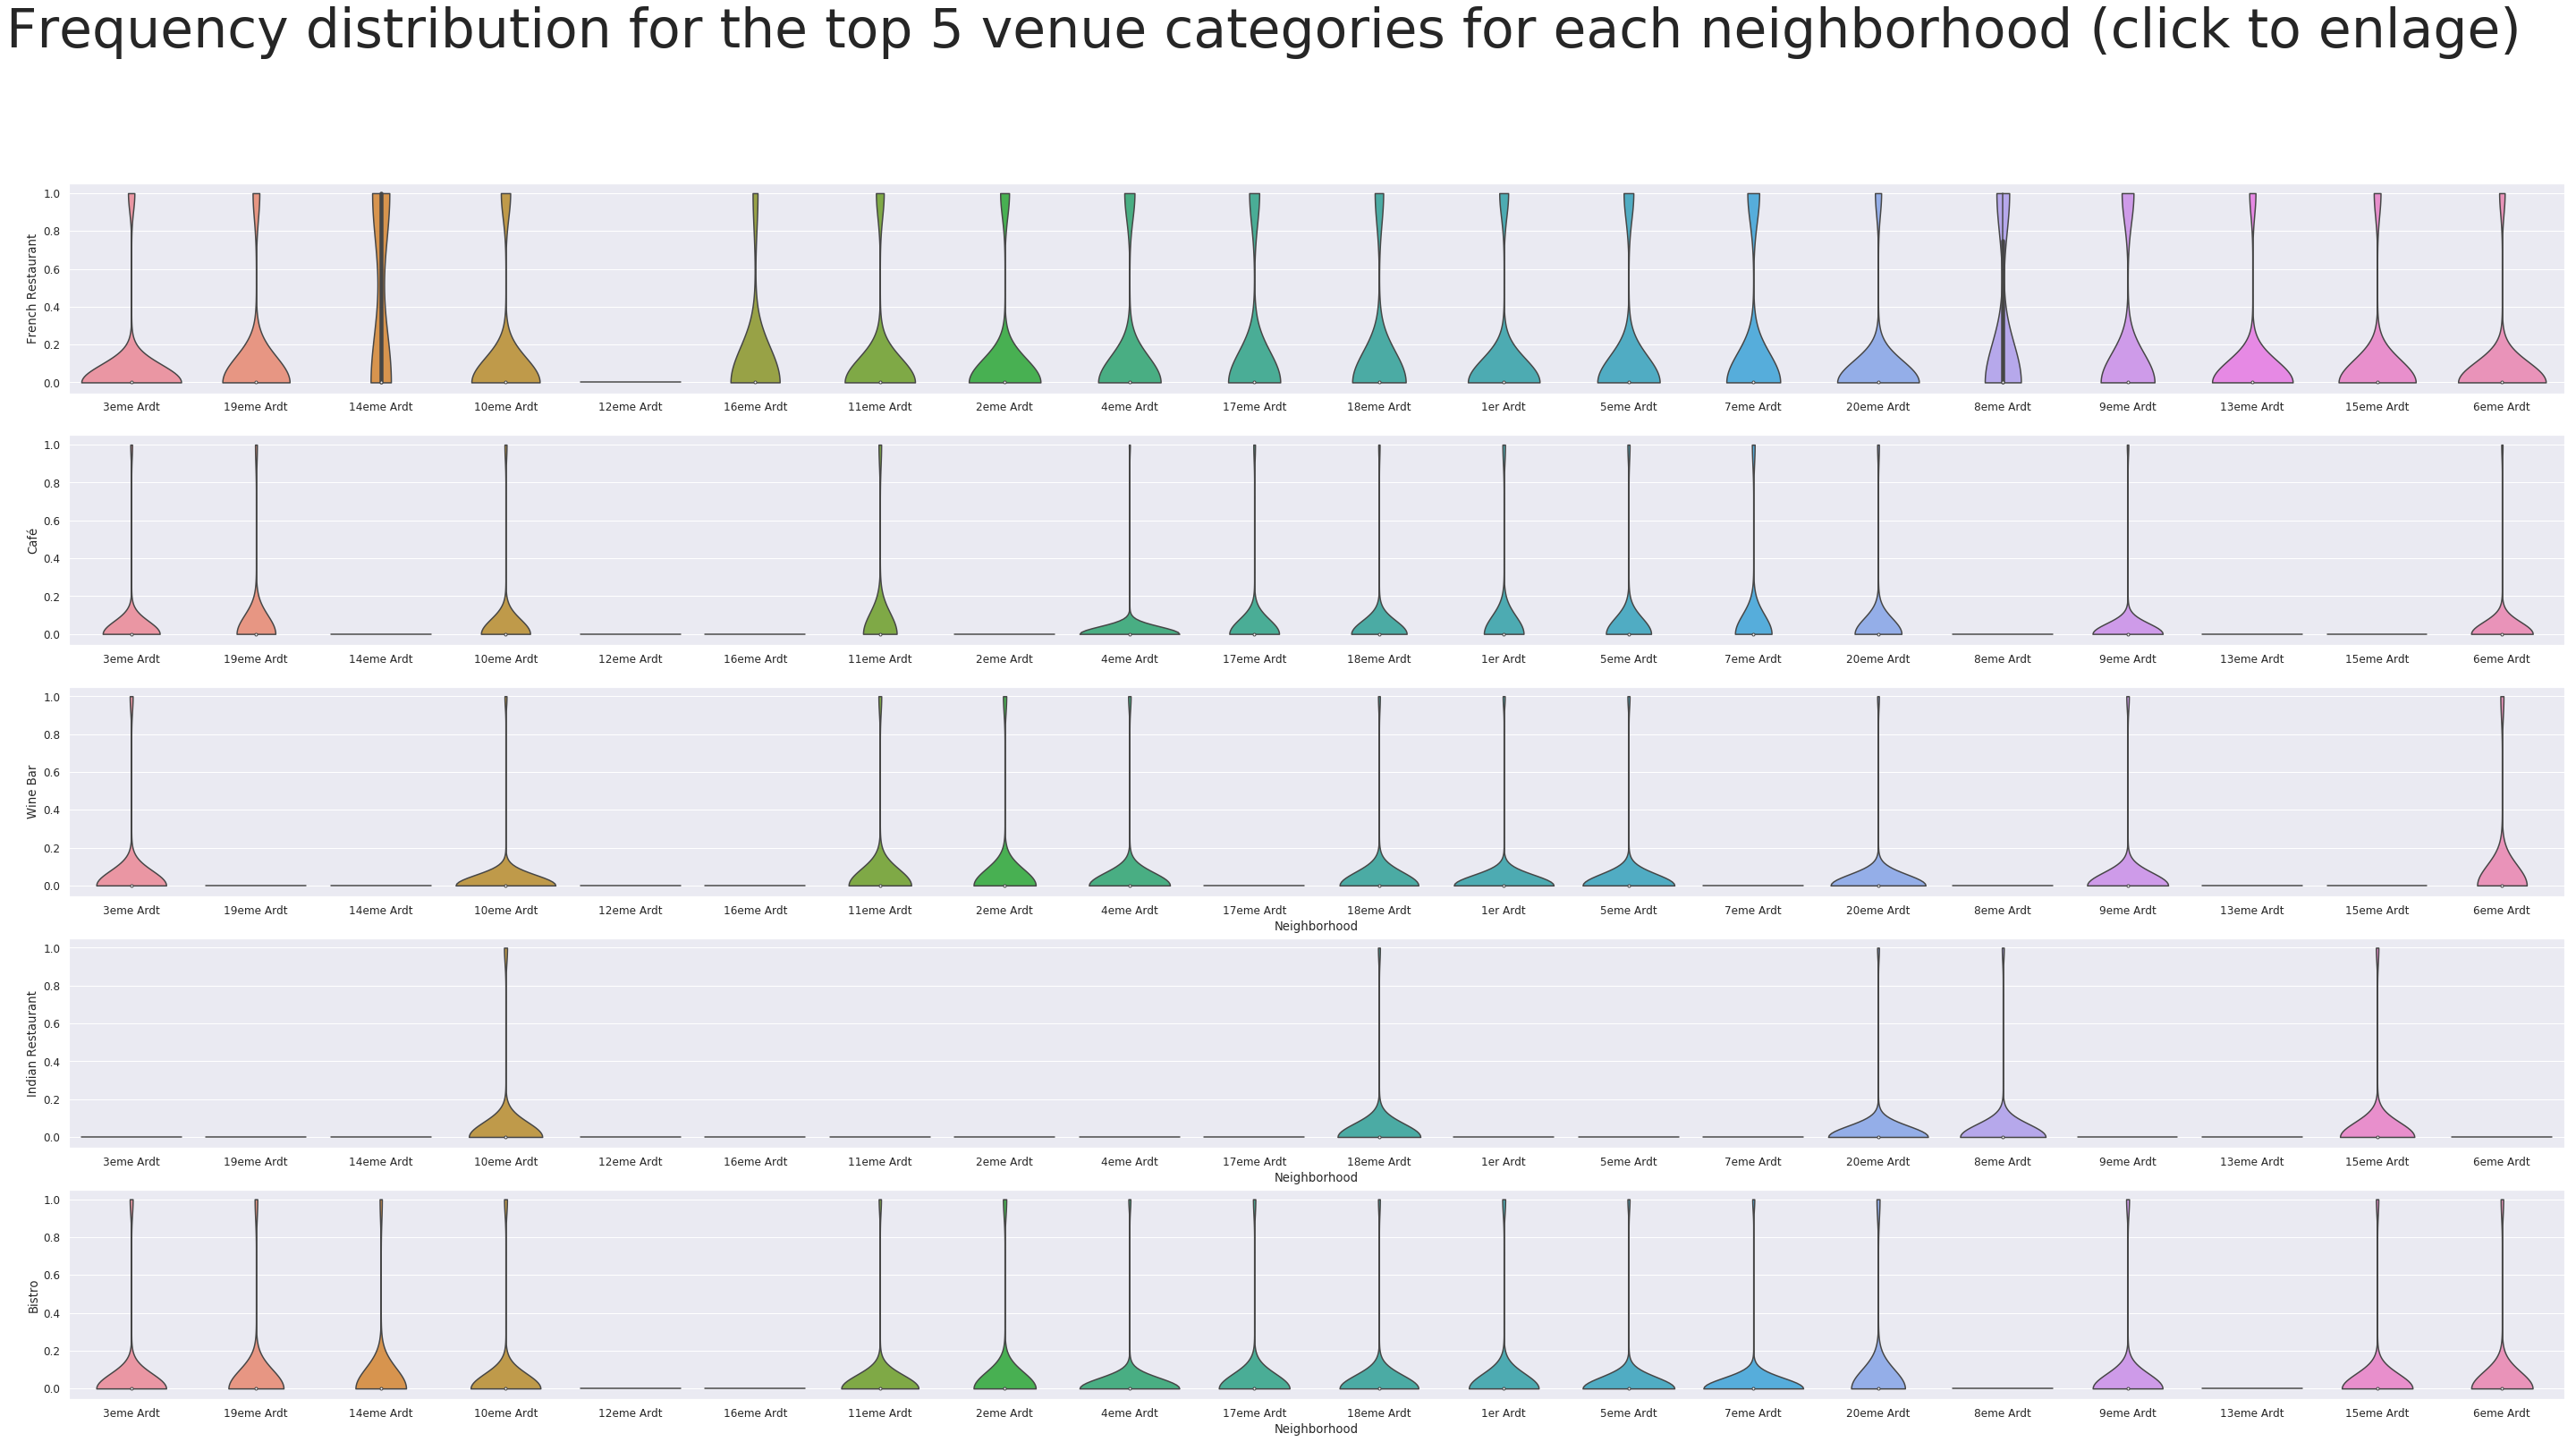

In [31]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(5,1,4)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=paris_onehot, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighborhood", y="Bistro", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 5 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_5_categories.png", dpi=240)
plt.show()

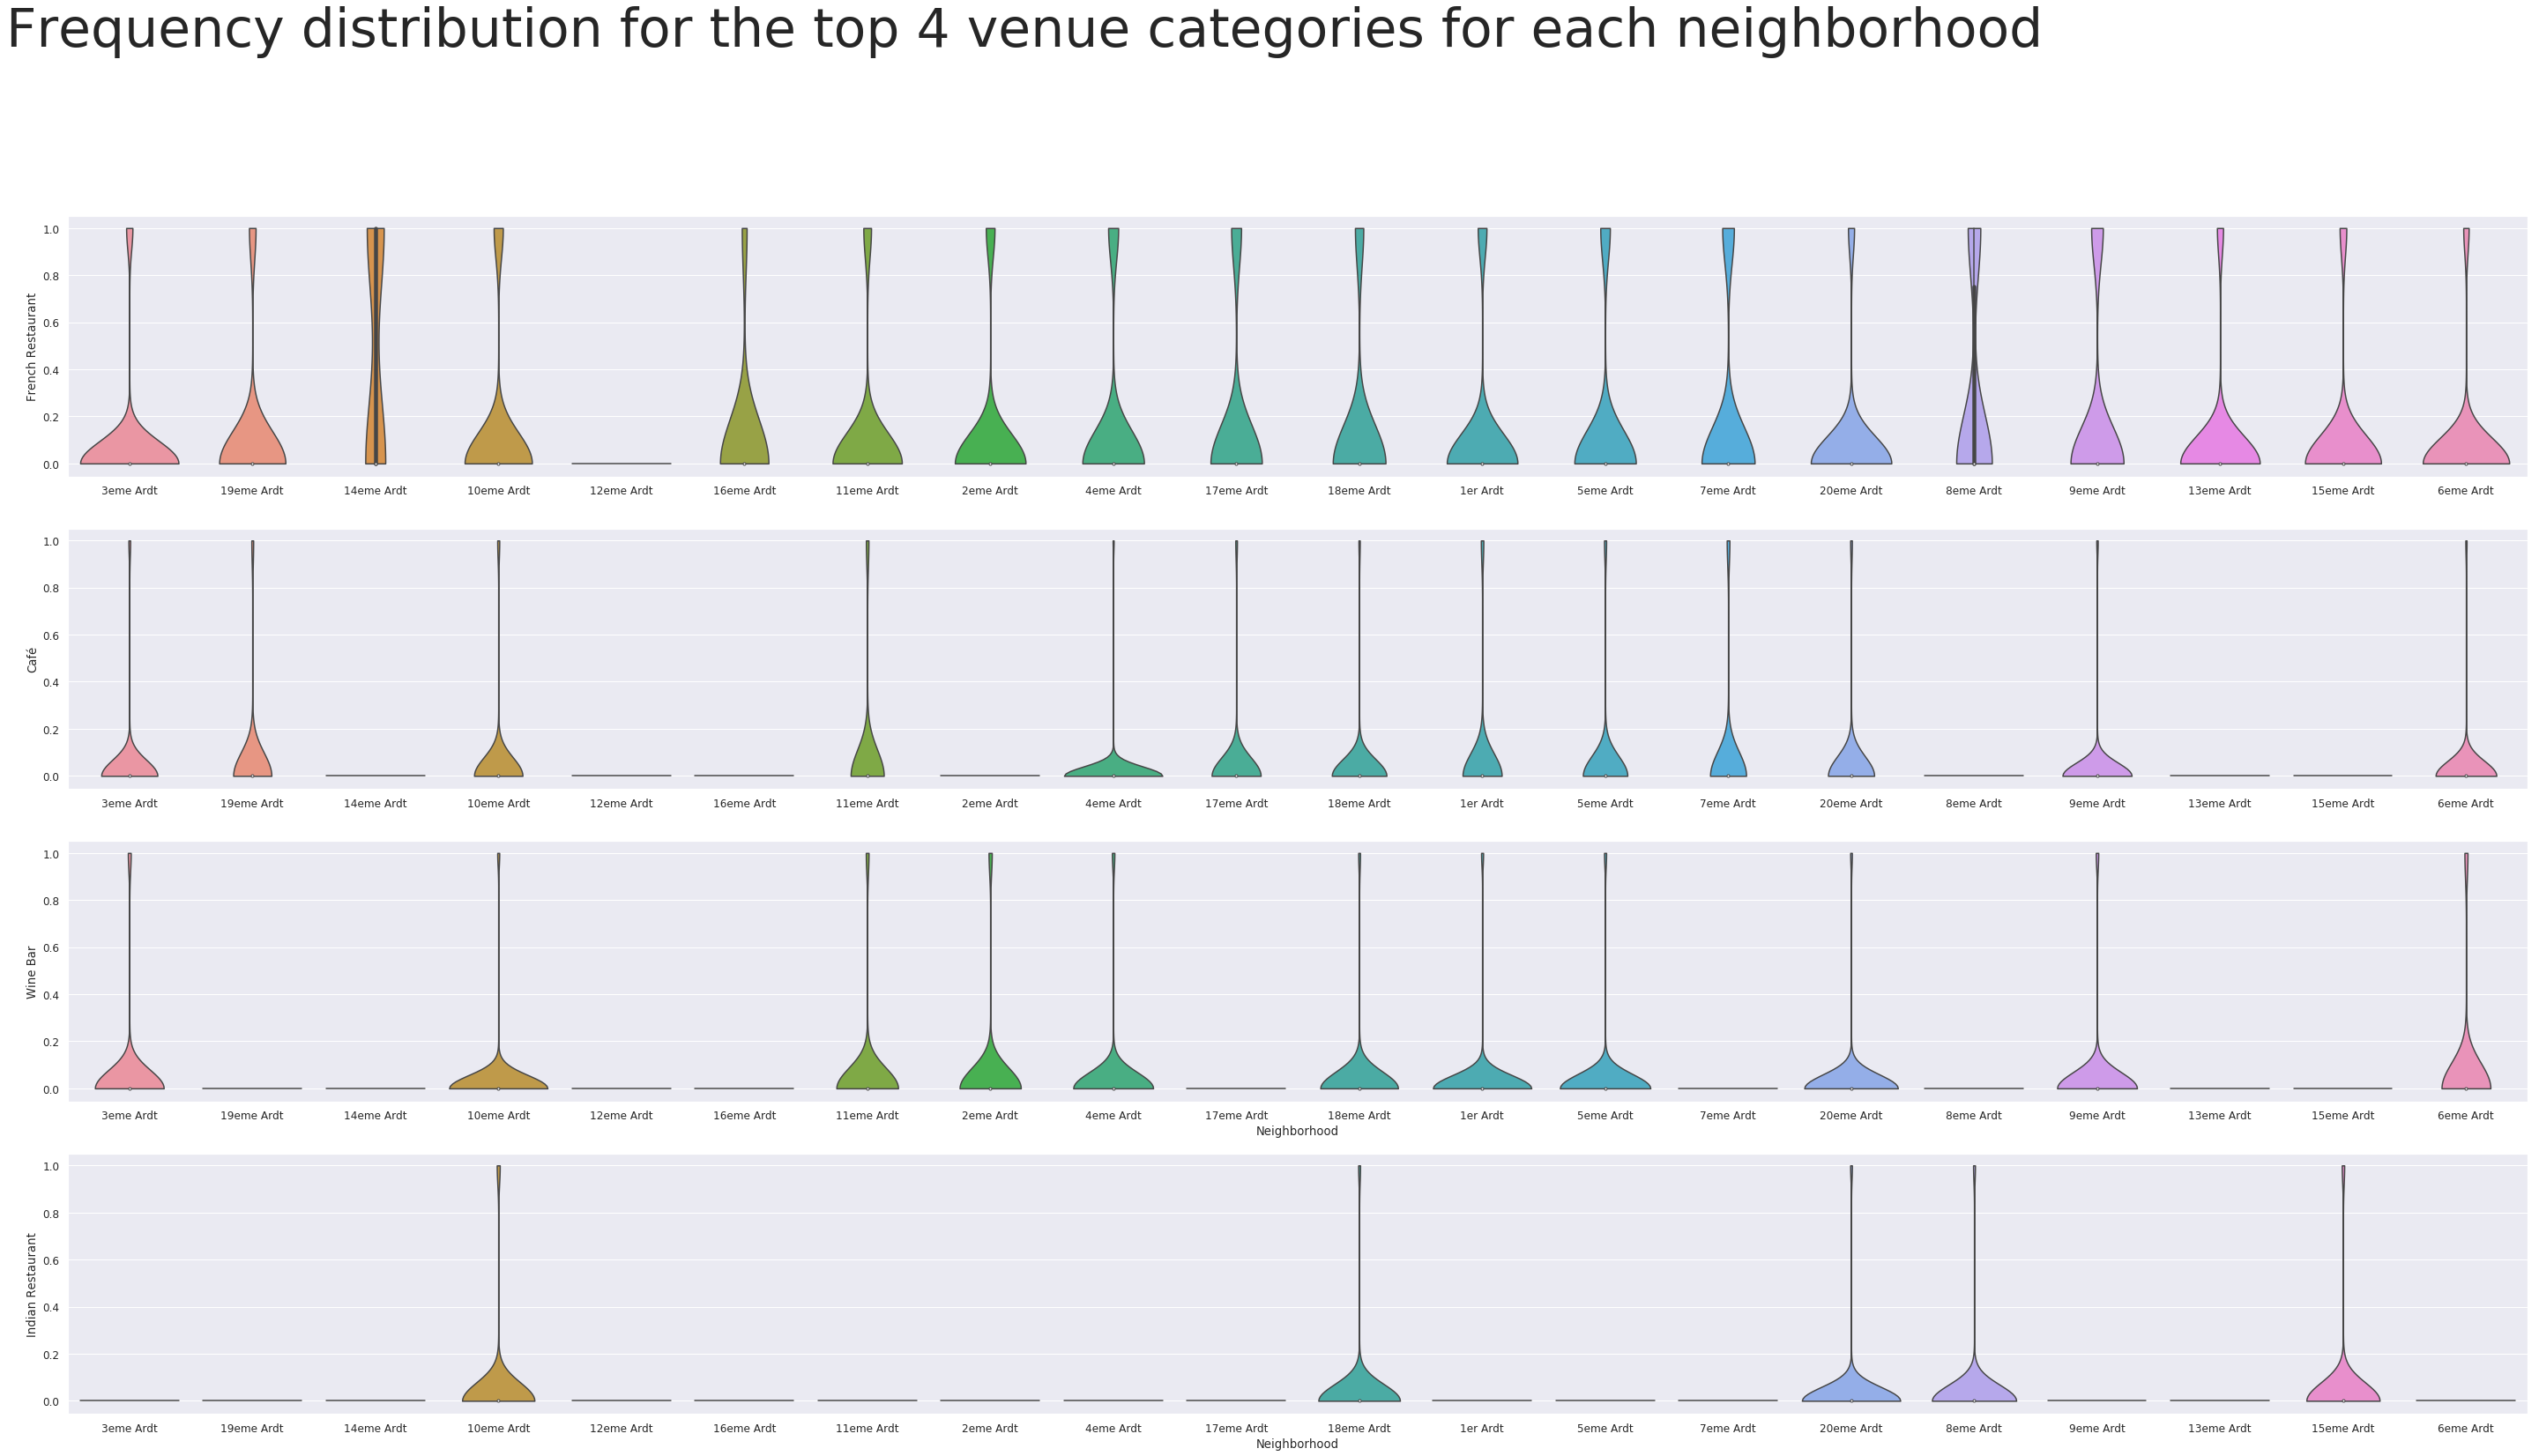

In [33]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 4 venue categories for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories_clothing.png", dpi=240)
plt.show()

In [34]:
# Creating the dataframe 
print(paris.loc[paris['Arrondissement_Num'] ==  10])
print(paris.loc[paris['Arrondissement_Num'] ==  18])
print(paris.loc[paris['Arrondissement_Num'] ==  20])

   Arrondissement_Num Neighborhood  French_Name  Latitude  Longitude
3                  10      Entrepot  10eme Ardt  48.87613   2.360728
    Arrondissement_Num      Neighborhood  French_Name   Latitude  Longitude
10                  18  Buttes-Montmartre  18eme Ardt  48.892569   2.348161
    Arrondissement_Num Neighborhood  French_Name   Latitude  Longitude
14                  20  Menilmontant  20eme Ardt  48.863461   2.401188


In [35]:
paris_selected = {'Arrondissement_Num':[10,18,20], 
        'Neighborhood':['Entrepot', 'Buttes-Montmartre', 'Menilmontant'], 
        'French_Name':['10eme Ardt', '18eme Ardt', '20eme Ardt'], 
        'Latitude':[48.87613, 48.892569, 48.863461],
        'Longitude':[2.360728,2.348161,2.401188]} 
paris_selected=pd.DataFrame(paris_selected)
paris_selected

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,10,Entrepot,10eme Ardt,48.876130,2.360728
1,18,Buttes-Montmartre,18eme Ardt,48.892569,2.348161
2,20,Menilmontant,20eme Ardt,48.863461,2.401188


In [36]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(paris_selected['Latitude'], paris_selected['Longitude'], paris_selected['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [37]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(paris_selected['Latitude'], paris_selected['Longitude'], paris_selected['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [40]:

# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 4, 3, 0, 1, 0, 0, 0], dtype=int32)

In [41]:

# add clustering labels
paris_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Café,Indian Restaurant,Bistro,Pizza Place,Japanese Restaurant,Bar,Thai Restaurant
1,0,11eme Ardt,French Restaurant,Café,Restaurant,Supermarket,Wine Bar,Pastry Shop,Bistro,Japanese Restaurant,Italian Restaurant,Cocktail Bar
2,2,12eme Ardt,Zoo Exhibit,Bike Rental / Bike Share,Park,Supermarket,Monument / Landmark,Zoo,Ice Cream Shop,Electronics Store,Food & Drink Shop,Flower Shop
3,4,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Bakery,Gourmet Shop,Park,Furniture / Home Store
4,3,14eme Ardt,French Restaurant,Hotel,Brasserie,Bistro,Sushi Restaurant,Supermarket,Bakery,Fast Food Restaurant,Tea Room,Food & Drink Shop


In [42]:
paris_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Café,Indian Restaurant,Bistro,Pizza Place,Japanese Restaurant,Bar,Thai Restaurant
1,0,11eme Ardt,French Restaurant,Café,Restaurant,Supermarket,Wine Bar,Pastry Shop,Bistro,Japanese Restaurant,Italian Restaurant,Cocktail Bar
2,2,12eme Ardt,Zoo Exhibit,Bike Rental / Bike Share,Park,Supermarket,Monument / Landmark,Zoo,Ice Cream Shop,Electronics Store,Food & Drink Shop,Flower Shop
3,4,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Bakery,Gourmet Shop,Park,Furniture / Home Store
4,3,14eme Ardt,French Restaurant,Hotel,Brasserie,Bistro,Sushi Restaurant,Supermarket,Bakery,Fast Food Restaurant,Tea Room,Food & Drink Shop


In [43]:
paris_merged = paris_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_venues_sorted.set_index('Neighborhood'), on='French_Name')

paris_merged.head() # check the last columns!

,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place,0,French Restaurant,Bakery,Art Gallery,Bistro,Cocktail Bar,Wine Bar,Burger Joint,Sandwich Place,Japanese Restaurant,Italian Restaurant
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market,0,French Restaurant,Bakery,Art Gallery,Bistro,Cocktail Bar,Wine Bar,Burger Joint,Sandwich Place,Japanese Restaurant,Italian Restaurant
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place,0,French Restaurant,Bakery,Art Gallery,Bistro,Cocktail Bar,Wine Bar,Burger Joint,Sandwich Place,Japanese Restaurant,Italian Restaurant
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place,0,French Restaurant,Bakery,Art Gallery,Bistro,Cocktail Bar,Wine Bar,Burger Joint,Sandwich Place,Japanese Restaurant,Italian Restaurant
4,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park,0,French Restaurant,Bakery,Art Gallery,Bistro,Cocktail Bar,Wine Bar,Burger Joint,Sandwich Place,Japanese Restaurant,Italian Restaurant


In [44]:
paris_venues.head()

,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park


In [45]:
#Plotting the Clusters given by the K-means clustering 
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['French_Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1